## **SETUP**
Installing and importing Tensorflow, matplotlib

In [99]:
!pip install --upgrade pip setuptools

ERROR: To modify pip, please run the following command:
C:\Users\Jaden\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip setuptools

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-72.2.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-72.2.0-py3-none-any.whl (2.3 MB)


In [100]:
!pip install tensorflow-gpu==2.9.0


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
!pip install opencv-python matplotlib


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asgiref                      3.5.2
asttokens                    2.1.0
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        20.3.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.4.0
certifi                      2022.6.15
cffi                         1.15.1
charset-normalizer           2.1.0
colorama                     0.4.6
contourpy                    1.0.6
cryptography                 37.0.4
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
Django                       4.1
ent

In [103]:
import tensorflow as tf


In [104]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [105]:
tf.config.list_physical_devices('GPU')


[]

## **CLEANING DATA**


In [106]:
#from google.colab import drive
#drive.mount('/content/drive')

In [107]:
import os
filePath = 'data'
os.path.exists(filePath)

True

In [108]:
import cv2
import imghdr

In [109]:

melanoma = os.path.join(filePath, 'melanoma')


In [110]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [111]:
os.path.exists(melanoma)

True

In [112]:
os.listdir(filePath)

['acne', 'healthy skin', 'melanoma']

In [113]:
for image_class in os.listdir(filePath):
    for image in os.listdir(os.path.join(filePath, image_class)):

        image_path = os.path.join(filePath, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            print(e)
            # os.remove(image_path)

# **Loading Data**

In [114]:
import numpy as np
from matplotlib import pyplot as plt

In [115]:
data = tf.keras.utils.image_dataset_from_directory(filePath)

Found 300 files belonging to 3 classes.


In [116]:
data_iterator = data.as_numpy_iterator()

In [117]:
batch  = data_iterator.next()
# Acne (0), Healthy Skin (1), Melanoma (2)
# Caution when running this multiple times


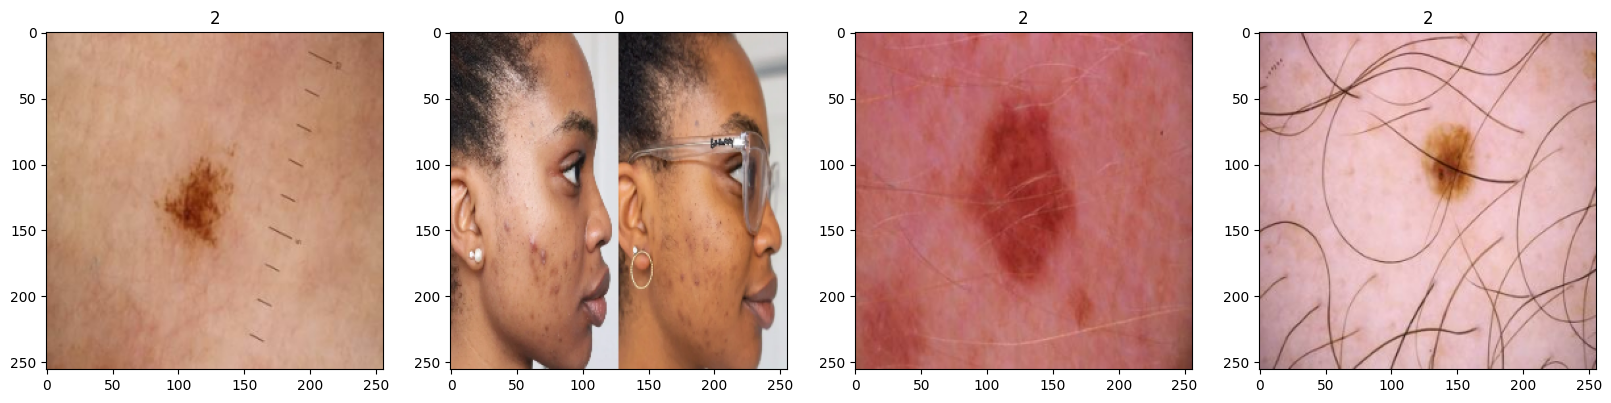

In [118]:
# Preview
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale Data**

In [119]:
data = data.map(lambda x,y: (x/255, y))


In [120]:
data.as_numpy_iterator().next()


(array([[[[0.4687177 , 0.33538434, 0.29616866],
          [0.49246323, 0.3591299 , 0.31991422],
          [0.5305982 , 0.3972649 , 0.35819402],
          ...,
          [0.52809435, 0.38523284, 0.34322917],
          [0.4976103 , 0.35061276, 0.30064338],
          [0.4693338 , 0.32031417, 0.26933378]],
 
         [[0.47729278, 0.34395942, 0.30474374],
          [0.50523895, 0.37190562, 0.33295062],
          [0.5449142 , 0.4115809 , 0.37462685],
          ...,
          [0.53427756, 0.39141607, 0.34941238],
          [0.50422794, 0.3572304 , 0.30726102],
          [0.48015207, 0.33113247, 0.28015208]],
 
         [[0.48045343, 0.3471201 , 0.30790442],
          [0.51106006, 0.3777267 , 0.33952206],
          [0.5492872 , 0.41595387, 0.38065976],
          ...,
          [0.5451287 , 0.40130615, 0.36218548],
          [0.5188309 , 0.37139893, 0.3252341 ],
          [0.49674407, 0.34772447, 0.2970337 ]],
 
         ...,
 
         [[0.5786152 , 0.4295956 , 0.41783088],
          [0.59442

In [121]:
len(data)

10

# **Split Data**

In [122]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size


7

In [123]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [124]:
len(train)
#len(val)
#len(test)


7

In [125]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [127]:
model = Sequential()

In [128]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
#final layer should match the number of classes

In [129]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [130]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# **Train**

In [131]:
logdir='logs'


In [132]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [133]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/11
7/7 [==============================] - 5s 566ms/step - loss: 1.1759 - accuracy: 0.3214 - val_loss: 1.0160 - val_accuracy: 0.5000
Epoch 2/11
7/7 [==============================] - 4s 504ms/step - loss: 0.9475 - accuracy: 0.4821 - val_loss: 0.8266 - val_accuracy: 0.6094
Epoch 3/11
7/7 [==============================] - 4s 511ms/step - loss: 0.7893 - accuracy: 0.6920 - val_loss: 0.5625 - val_accuracy: 0.7969
Epoch 4/11
7/7 [==============================] - 4s 503ms/step - loss: 0.5740 - accuracy: 0.7991 - val_loss: 0.5853 - val_accuracy: 0.8125
Epoch 5/11
7/7 [==============================] - 4s 506ms/step - loss: 0.6145 - accuracy: 0.7857 - val_loss: 0.4045 - val_accuracy: 0.8281
Epoch 6/11
7/7 [==============================] - 4s 506ms/step - loss: 0.4136 - accuracy: 0.8661 - val_loss: 0.4554 - val_accuracy: 0.7656
Epoch 7/11
7/7 [==============================] - 4s 516ms/step - loss: 0.3189 - accuracy: 0.8616 - val_loss: 0.2041 - val_accuracy: 0.9219
Epoch 8/11
7/7 [====

# **Analysis**

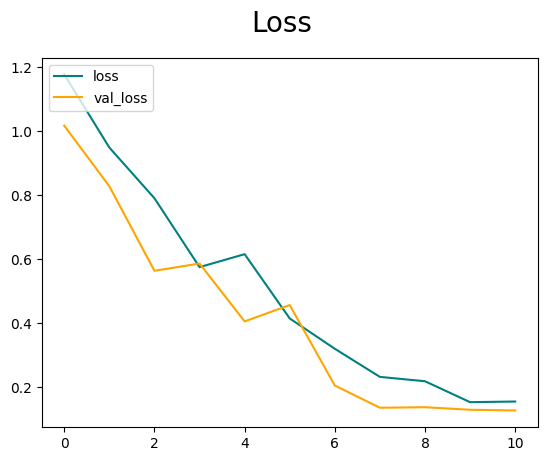

In [134]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate**

In [135]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [137]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [138]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    acc.update_state(y, yhat)
    pre.update_state(y, tf.argmax(yhat, axis=1))  # Converting predictions to label format
    re.update_state(y, tf.argmax(yhat, axis=1))


1/1 [==============================] - 0s 77ms/step


In [152]:
print(pre.result(), re.result(), acc.result())
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32)
1.0 0.875 0.9166667


# **Testing**

In [157]:
import cv2

In [160]:
os.listdir()

['.ipynb_checkpoints',
 'acne-open-comedo-22.jpg',
 'acne_test.jpeg',
 'data',
 'logs',
 'models',
 'skindoctor.ipynb']

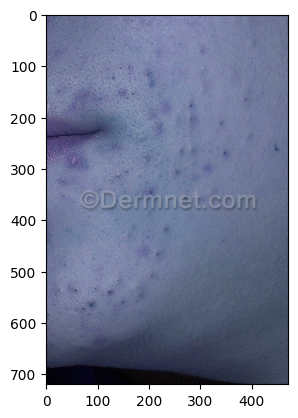

In [161]:
img = cv2.imread('acne-open-comedo-22.jpg')
plt.imshow(img)
plt.show()

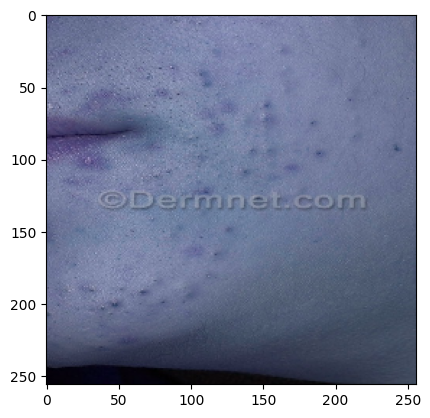

In [162]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [163]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 19ms/step


In [164]:
yhat[0]


array([9.9570483e-01, 4.2860461e-03, 9.1812935e-06], dtype=float32)

In [165]:
predicted_class = np.argmax(yhat, axis=1)
predicted_class

array([0], dtype=int64)

# **Saving Model**

In [146]:
from tensorflow.keras.models import load_model
#os.chdir('/content/drive/MyDrive/skindoctor')
os.getcwd()


'C:\\Users\\Jaden\\skindoctor\\skindoctor'

In [147]:
model.save(os.path.join('models','skindoctor.keras'))


In [148]:
#os.path.exists('models')
#os.listdir('models')
os.getcwd()
#does it reset every time you referesh page?( what determines the currentwroking dir)

'C:\\Users\\Jaden\\skindoctor\\skindoctor'

In [149]:
os.path.exists('models/skindoctor.keras')

True

In [150]:
new_model = load_model('models/skindoctor.keras')


In [151]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 48ms/step


array([[1.0758455e-05, 3.1420752e-14, 9.9998927e-01]], dtype=float32)